In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
titanic_data = pd.read_csv('train.csv')  # If the CSV is in the same directory as your script.



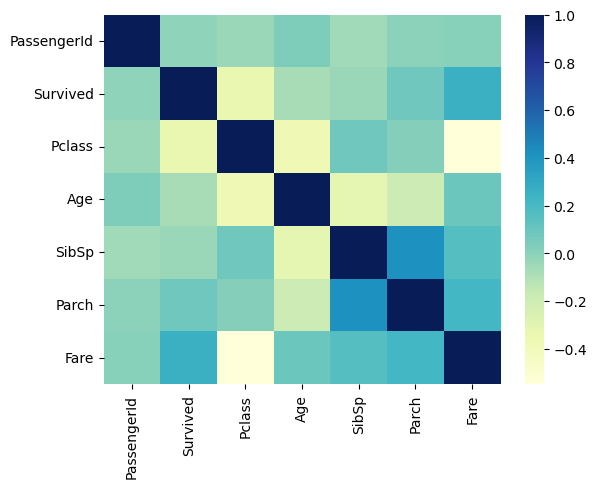

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_data = titanic_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()


In [13]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

In [18]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C92,C
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
294,295,0,3,"Mineff, Mr. Ivan",male,24.0,0,0,349233,7.8958,NaN,S
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


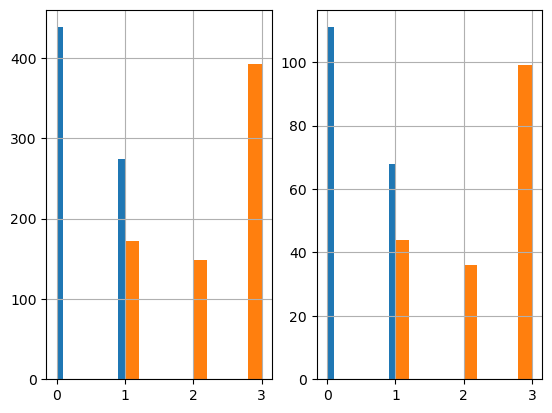

In [24]:
plt.subplot(1, 2, 1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1, 2, 2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [26]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 140 to 96
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator, TransformerMixin) :
    
    def fit (self, X,y=None) :
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])

In [29]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin):
    
    def fit (self, X, y=None) :
        return self
    
    def transform (self, X):
        encoder = OneHotEncoder ()
        matrix = encoder.fit_transform([['Embarked']]).toarray()
        
        column_names = ["C", "S" , "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
            matrix = encoder.fit_transform(X[['Sex']]).toarray ()
            
            column_names = ["Females", "Male"]
            
            for i in range(len(matrix)) :
                X[column_names[i]] = matrix.T[i]
                
            return x
                
                
                

In [30]:
class FeatureDropper (BaseEstimator, TransformerMixin) :
    
    def fit (self, X, y=None):
        return self
    
    def transform(self, X) :
        return x.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignores")

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Define the AgeImputer class
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, y=None):
        self.median_ = np.nanmedian(X)
        return self

    def transform(self):
        return np.where(np.isnan, self.median)

# Now create the pipeline
pipeline = Pipeline([
    ("ageimputer", AgeImputer()),
    
])



In [16]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

# Custom Transformer: FeatureEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(sparse=False)

    def fit(self, y=None):
        self.encoder.fit()
        return self

    def transform(self):
        return self.encoder.transform()


In [2]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])
                     

NameError: name 'AgeImputer' is not defined

In [3]:
plt.subplot(1, 2, 3)
strat_train_set['Survived'].boxplot()
strat_train_set['Pclass'].boxplot()

plt.subplot(1, 3, 2)
strat_test_set['Survived'].boxplot()
strat_test_set['Pclass'].boxplot()

plt.show()

NameError: name 'plt' is not defined

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(3, 2))
sns.boxplot(data=df)

# Customize the plot (optional)
plt.title('Survived')
plt.xlabel('pclass')
plt.ylabel('Age')

# Show the plot
plt.show()


NameError: name 'data' is not defined

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the datasets from CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check the structure of the data (optional)
print(train_df.head())
print(test_df.head())

# Assuming you want to plot specific columns from the train dataset
# Adjust the column names according to your dataset
columns_to_plot = ['column1', 'column2', 'column3']  # Replace with actual column names from your CSV

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df[columns_to_plot])

# Customize the plot (optional)
plt.title('Box Plot of Selected Columns from Train Data')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

KeyError: "None of [Index(['column1', 'column2', 'column3'], dtype='object')] are in the [columns]"

<Figure size 800x600 with 0 Axes>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

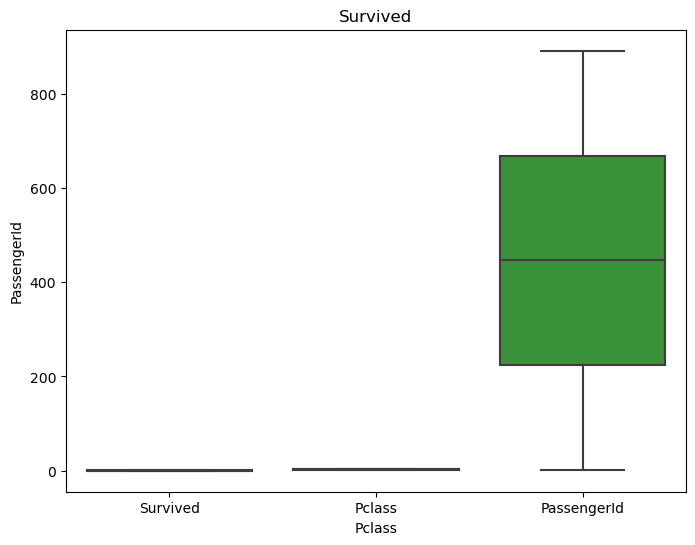

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the datasets from CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check the structure of the data (optional)
print(train_df.head())
print(test_df.head())

# Assuming you want to plot specific columns from the train dataset
# Adjust the column names according to your dataset
columns_to_plot = ['Survived', 'Pclass', 'PassengerId']  # Replace with actual column names from your CSV

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df[columns_to_plot])

# Customize the plot (optional)
plt.title('Survived')
plt.xlabel('Pclass')
plt.ylabel('PassengerId')

# Show the plot
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

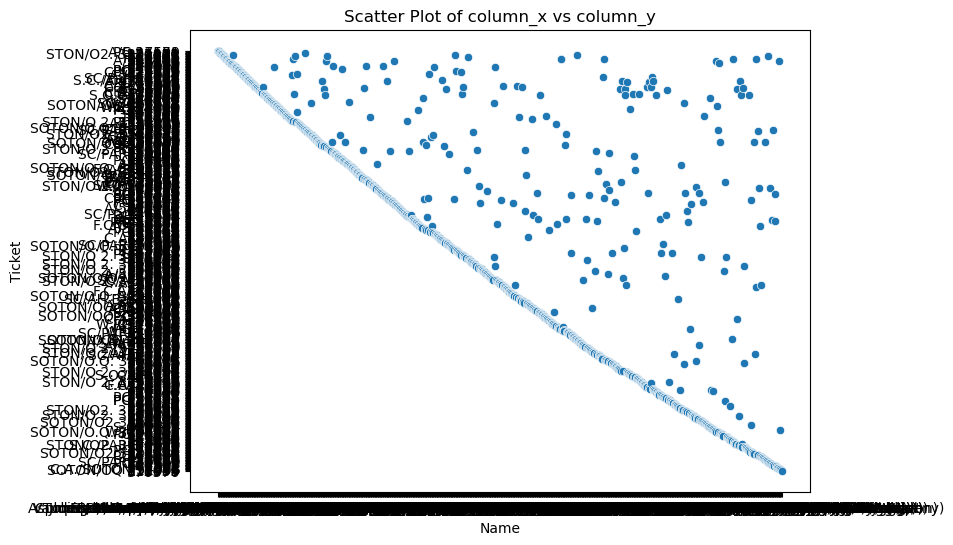

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the datasets from CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check the structure of the data (optional)
print(train_df.head())
print(test_df.head())

# Scatter plot between two columns from train dataset
# Replace 'column_x' and 'column_y' with actual column names
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Name', y='Ticket', data=train_df)

# Customize the plot (optional)
plt.title('Scatter Plot of column_x vs column_y')
plt.xlabel('Name')  # Replace with the actual name
plt.ylabel('Ticket')  # Replace with the actual name

# Show the plot
plt.show()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

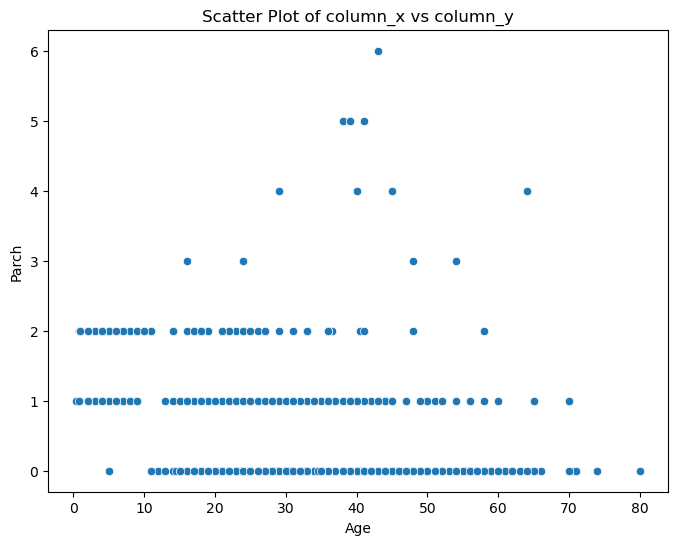

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the datasets from CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Check the structure of the data (optional)
print(train_df.head())
print(test_df.head())

# Scatter plot between two columns from train dataset
# Replace 'column_x' and 'column_y' with actual column names
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Parch', data=train_df)

# Customize the plot (optional)
plt.title('Scatter Plot of column_x vs column_y')
plt.xlabel('Age')  # Replace with the actual name
plt.ylabel('Parch')  # Replace with the actual name

# Show the plot
plt.show()


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


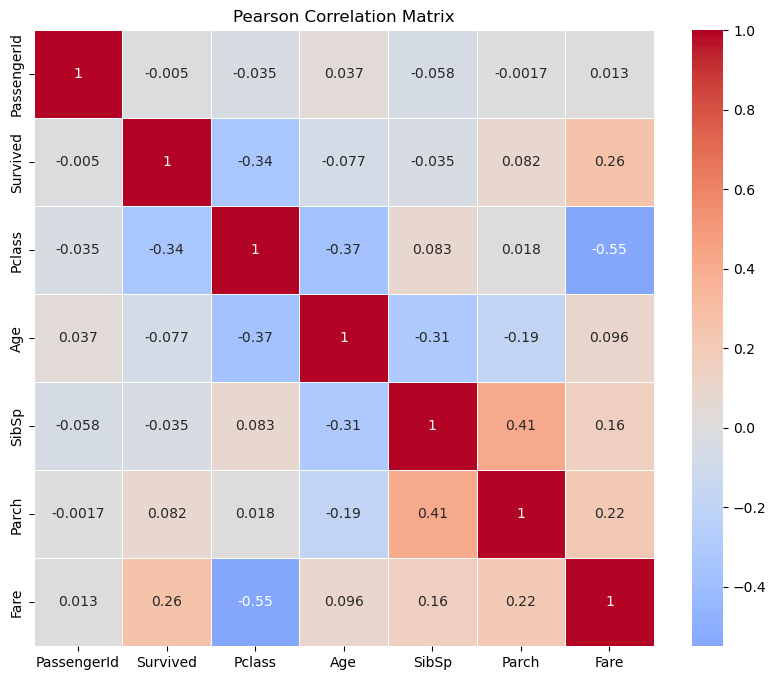

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('train.csv')

# Select only numeric columns (exclude non-numeric data like strings)
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate the Pearson correlation matrix
correlation_matrix = numeric_df.corr(method='pearson')

# Print the correlation matrix (optional)
print(correlation_matrix)

# Plot the Pearson correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)

# Customize the plot (optional)
plt.title('Pearson Correlation Matrix')
plt.show()


In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training data
print(train_df.head())
print(train_df.info())  # To see data types and missing values


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [2]:
# Example: Filling missing values for numerical columns with the mean
for col in train_df.select_dtypes(include=['float64', 'int64']).columns:
    train_df[col].fillna(train_df[col].mean(), inplace=True)

# Example: Encoding categorical variables (if any)
train_df = pd.get_dummies(train_df, drop_first=True)

# Repeat for test_df
test_df.fillna(test_df.mean(), inplace=True)
test_df = pd.get_dummies(test_df, drop_first=True)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing relationships using a pairplot or heatmap
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = train_df.drop('target_column', axis=1)  # Replace 'target_column' with the actual target variable
y = train_df['target_column']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier()  # For a classification task
model.fit(X_train, y_train)


In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_val)

# If you want to predict on the test set
X_test = test_df  # Ensure test_df has the same feature columns as X_train
test_predictions = model.predict(X_test)


In [ ]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# You can also visualize predictions vs actual
import matplotlib.pyplot as plt
sns.countplot(x=y_pred)
plt.title('Predictions Distribution')
plt.show()


In [ ]:
# Handling missing values
# Filling missing values for numerical columns with the mean
for col in train_df.select_dtypes(include=['float64', 'int64']).columns:
    train_df[col].fillna(train_df[col].mean(), inplace=True)

# Handling categorical variables by encoding them
train_df = pd.get_dummies(train_df, drop_first=True)

# Repeat preprocessing for the test set
for col in test_df.select_dtypes(include=['float69', 'int64']).columns:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

test_df = pd.get_dummies(test_df, drop_first=True)

# Ensure that test_df has the same columns as train_df (for predictions)
test_df = test_df.reindex(columns=train_df.columns.drop('Name'), fill_value=0)  # Replace 'target_column'
